In [110]:
# import required library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [111]:
# read the data
df = pd.read_csv('train.csv')
df

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
0,121610,7309831550,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,NaN,sedan,black,ga,34.139588,-83.971135,2021-04-20T11:46:13-0400,7995
1,395646,7317007429,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,NaN,SUV,black,wa,47.756950,-122.212230,2021-05-04T16:16:32-0700,14999
2,236366,7309202024,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,NaN,sedan,NaN,nc,34.209703,-77.843995,2021-04-19T10:07:58-0400,5995
3,66001,7306341714,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,NaN,SUV,NaN,ca,33.811000,-117.849300,2021-04-13T13:05:06-0700,0
4,320855,7307880118,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,full-size,SUV,silver,pa,40.143550,-76.597071,2021-04-16T15:22:02-0400,7995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290124,359783,7315304329,2007.0,dodge,charger,NaN,NaN,gas,1000.0,clean,automatic,NaN,NaN,NaN,NaN,tx,32.856500,-96.599900,2021-05-01T10:15:37-0500,200
290125,358083,7316875320,2013.0,hyundai,santa fe sport awd,good,4 cylinders,gas,114000.0,clean,automatic,4wd,NaN,NaN,black,tx,32.818710,-96.992283,2021-05-04T14:06:55-0500,8900
290126,152315,7313432323,2013.0,NaN,Scion xB,excellent,4 cylinders,gas,94000.0,clean,automatic,fwd,NaN,wagon,NaN,ia,42.484503,-92.324974,2021-04-27T13:00:51-0500,7300
290127,117952,7316213204,2009.0,jeep,wrangler,good,6 cylinders,gas,108000.0,clean,automatic,NaN,full-size,SUV,red,ga,33.938100,-84.197200,2021-05-03T11:23:11-0400,4500


In [112]:
# shape of data
df.shape

(290129, 20)

In [113]:
#the name of the columns 
df.columns

Index(['Unnamed: 0', 'id', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'posting_date', 'price'],
      dtype='object')

In [114]:
# Checking total missing values
df.isnull().sum()

Unnamed: 0           0
id                   0
year                 0
manufacturer     11342
model                0
condition       116104
cylinders       119300
fuel              1453
odometer             0
title_status      5066
transmission         0
drive            88087
size            207684
type             62596
paint_color      87113
state                0
lat               4403
long              4403
posting_date         0
price                0
dtype: int64

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290129 entries, 0 to 290128
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    290129 non-null  int64  
 1   id            290129 non-null  int64  
 2   year          290129 non-null  float64
 3   manufacturer  278787 non-null  object 
 4   model         290129 non-null  object 
 5   condition     174025 non-null  object 
 6   cylinders     170829 non-null  object 
 7   fuel          288676 non-null  object 
 8   odometer      290129 non-null  float64
 9   title_status  285063 non-null  object 
 10  transmission  290129 non-null  object 
 11  drive         202042 non-null  object 
 12  size          82445 non-null   object 
 13  type          227533 non-null  object 
 14  paint_color   203016 non-null  object 
 15  state         290129 non-null  object 
 16  lat           285726 non-null  float64
 17  long          285726 non-null  float64
 18  post

# Data Cleaning

as we saw in the previous two cells  we have a many columns that contain a lots of non-value and that's will effect badlly in our model.
so we decide to remove , edit this columns depends on how much null-value they contain

## Drop columns
here we want to drop some columns and the reason for that the following :

1. `id` : in this types of feature we don't need it at all because it's doesn't affect in our model

2. `lat` and `long` : this type of feature contain irrelative feature  .

3. `posting_date` : as we can see in the data all posting_date are in the same year and the month as well so its mean that its **constance** , the second reason this type of features its also irrelative feature .

4. `size` : as we can see in the number of null_value we can see that's more than 80% of the data is null so it'll effects badly to our model so we prefer to delete it.

5. `state` : the city that the car are in their doesn't matter because it not effect in the price of the car



In [116]:
# drop the above feature
df.drop([ 'Unnamed: 0','id', 'lat', 'long', 'posting_date', 'size', 'state'], axis=1, inplace=True)
df

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,price
0,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,sedan,black,7995
1,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,SUV,black,14999
2,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,sedan,NaN,5995
3,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,SUV,NaN,0
4,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,SUV,silver,7995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290124,2007.0,dodge,charger,NaN,NaN,gas,1000.0,clean,automatic,NaN,NaN,NaN,200
290125,2013.0,hyundai,santa fe sport awd,good,4 cylinders,gas,114000.0,clean,automatic,4wd,NaN,black,8900
290126,2013.0,NaN,Scion xB,excellent,4 cylinders,gas,94000.0,clean,automatic,fwd,wagon,NaN,7300
290127,2009.0,jeep,wrangler,good,6 cylinders,gas,108000.0,clean,automatic,NaN,SUV,red,4500


### now we wants to handling the remain null value 
so we want to see the percentage of null value in each feature and after the result we will decide what to do

In [117]:

df.isna().sum()/df.shape[0]*100

year             0.000000
manufacturer     3.909296
model            0.000000
condition       40.018061
cylinders       41.119640
fuel             0.500812
odometer         0.000000
title_status     1.746120
transmission     0.000000
drive           30.361322
type            21.575230
paint_color     30.025609
price            0.000000
dtype: float64

as shown above we can see that `"year"`, `"manufacturer"`, `"model"`, and `"odometer"` column has less than **5%** of null values. So we can simply `drop` those rows which have null values in these two columns.

In [118]:
df = df.dropna(subset=['year', 'odometer', 'manufacturer', 'model'])
df

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,price
0,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,sedan,black,7995
1,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,SUV,black,14999
2,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,sedan,NaN,5995
3,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,SUV,NaN,0
4,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,SUV,silver,7995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290123,2006.0,ram,3500 dually 5.9l 6-sp,NaN,6 cylinders,diesel,84891.0,clean,manual,4wd,truck,NaN,0
290124,2007.0,dodge,charger,NaN,NaN,gas,1000.0,clean,automatic,NaN,NaN,NaN,200
290125,2013.0,hyundai,santa fe sport awd,good,4 cylinders,gas,114000.0,clean,automatic,4wd,NaN,black,8900
290127,2009.0,jeep,wrangler,good,6 cylinders,gas,108000.0,clean,automatic,NaN,SUV,red,4500


For all the missing values in other columns, we have just converted them in to a new category, `"unknown"`

In [119]:
df.fillna('unknown', inplace=True)
df

C:\Users\emana\AppData\Local\Temp\ipykernel_18496\1142219053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna('unknown', inplace=True)


,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,price
0,2007.0,infiniti,m45,excellent,unknown,gas,214740.0,clean,automatic,rwd,sedan,black,7995
1,2008.0,cadillac,escalade,unknown,unknown,gas,170276.0,clean,automatic,unknown,SUV,black,14999
2,2003.0,lexus,es,unknown,unknown,gas,176910.0,clean,automatic,fwd,sedan,unknown,5995
3,2017.0,bmw,320i,excellent,unknown,gas,41000.0,clean,automatic,4wd,SUV,unknown,0
4,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,SUV,silver,7995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290123,2006.0,ram,3500 dually 5.9l 6-sp,unknown,6 cylinders,diesel,84891.0,clean,manual,4wd,truck,unknown,0
290124,2007.0,dodge,charger,unknown,unknown,gas,1000.0,clean,automatic,unknown,unknown,unknown,200
290125,2013.0,hyundai,santa fe sport awd,good,4 cylinders,gas,114000.0,clean,automatic,4wd,unknown,black,8900
290127,2009.0,jeep,wrangler,good,6 cylinders,gas,108000.0,clean,automatic,unknown,SUV,red,4500


### handling duplicated values

In [120]:
df.duplicated().sum()

104795

so as we can see here there is no duplicate values

## Categorical data
now we'll starts with Categorical data cleaning
let's start

### `manufacturer` column

In [121]:
# now we want to see the classes in it
manufacturer = df['manufacturer'].value_counts()
manufacturer

ford               48457
chevrolet          37324
toyota             23396
honda              14545
jeep               13052
nissan             12920
ram                12056
gmc                11373
bmw                10174
dodge               9317
mercedes-benz       7946
hyundai             7127
subaru              6513
volkswagen          6425
kia                 5750
lexus               5653
audi                5185
cadillac            4817
chrysler            4121
acura               4108
buick               3792
mazda               3699
infiniti            3310
lincoln             2908
mitsubishi          2275
volvo               2254
mini                1657
pontiac             1553
jaguar              1358
rover               1236
porsche              967
mercury              805
saturn               734
alfa-romeo           616
tesla                595
fiat                 555
harley-davidson       79
ferrari               58
datsun                42
aston-martin          21


Looking at the count of manufacturers, it is evident that there are a few manufacturers with significantly higher vehicle counts compared to the rest. The top 30 manufacturers account for a large portion of the data, while the remaining manufacturers have relatively smaller counts.

In [122]:
# here we will apply the lambda function and it's will loop in every instance in thsi column and if the manufacturer from the 30 its will remain the same and if it's not will rename it other
df['manufacturer'] = df['manufacturer'].apply(lambda x: x if str(x) in manufacturer[:30] else 'others')
df['manufacturer']

C:\Users\emana\AppData\Local\Temp\ipykernel_18496\3076479198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['manufacturer'] = df['manufacturer'].apply(lambda x: x if str(x) in manufacturer[:30] else 'others')


0         infiniti
1         cadillac
2            lexus
3              bmw
4           toyota
            ...   
290123         ram
290124       dodge
290125     hyundai
290127        jeep
290128        ford
Name: manufacturer, Length: 278787, dtype: object

### ` model` column

In [123]:
model = df['model'].value_counts()
model[:50]

f-150                 5507
silverado 1500        3483
1500                  2882
camry                 2137
silverado             2099
accord                2071
wrangler              1948
2500                  1909
escape                1886
civic                 1867
altima                1842
explorer              1768
tacoma                1716
grand cherokee        1694
corolla               1516
mustang               1500
equinox               1354
cr-v                  1326
fusion                1315
focus                 1244
rav4                  1191
charger               1187
sonata                1186
malibu                1177
impala                1174
tahoe                 1172
corvette              1145
grand caravan         1123
sierra 1500           1100
f-250                 1057
outback               1050
silverado 2500hd      1041
3500                  1022
odyssey               1020
elantra               1017
cruze                 1017
edge                  1008
t

as we did in the manufacturer column we will apply the same method in this column but here the first 50 

In [124]:

df['model'] = df['model'].apply(lambda x: x if str(x) in model[:50] else 'others')
df['model']

C:\Users\emana\AppData\Local\Temp\ipykernel_18496\541743144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].apply(lambda x: x if str(x) in model[:50] else 'others')


0           others
1           others
2           others
3           others
4             rav4
            ...   
290123      others
290124     charger
290125      others
290127    wrangler
290128      others
Name: model, Length: 278787, dtype: object

In [125]:
# now lets see all value counts for all columns 
for i in df.columns:
    print(i, len(df[i].value_counts().index))

year 104
manufacturer 31
model 51
condition 7
cylinders 9
fuel 6
odometer 84767
title_status 7
transmission 3
drive 4
type 14
paint_color 13
price 13137


## Numerical Data 
numerical Data Cleaning

In [126]:
# let's see more info 
df.describe()

,year,odometer,price
count,278787.000000,2.787870e+05,2.787870e+05
mean,2011.638520,9.620462e+04,5.327949e+04
std,8.598953,1.920559e+05,9.784836e+06
min,1900.000000,0.000000e+00,0.000000e+00
25%,2009.000000,3.815500e+04,5.995000e+03
50%,2014.000000,8.566200e+04,1.399500e+04
75%,2017.000000,1.330000e+05,2.650000e+04
max,2022.000000,1.000000e+07,3.736929e+09


here we want to create a function for plotting the box plot to get more insight about the outlier 

In [127]:
def box_plot(name):
    # Create subplots to display multiple box plots side by side
    plt.figure(figsize=(8, 4))

    # Box plot for 'price' column
    sns.boxplot(x=df[name], color='lightblue')
    plt.xlabel(name)
    plt.title(f'Box Plot of {name}')

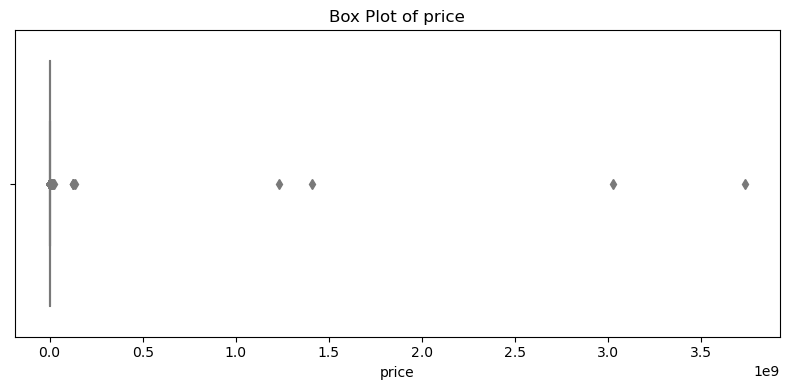

In [128]:
box_plot('price')

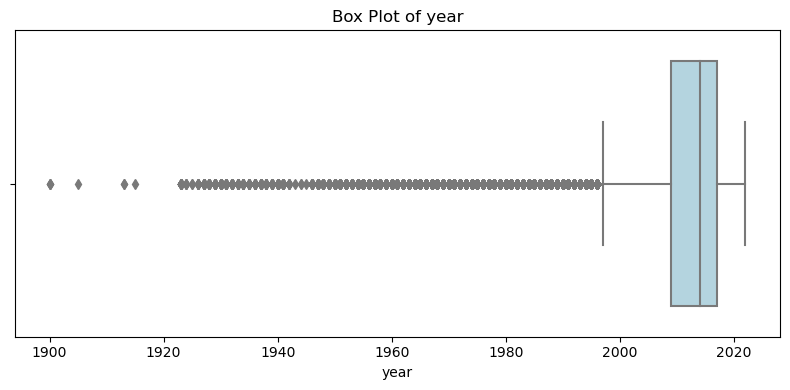

In [129]:
box_plot('year')

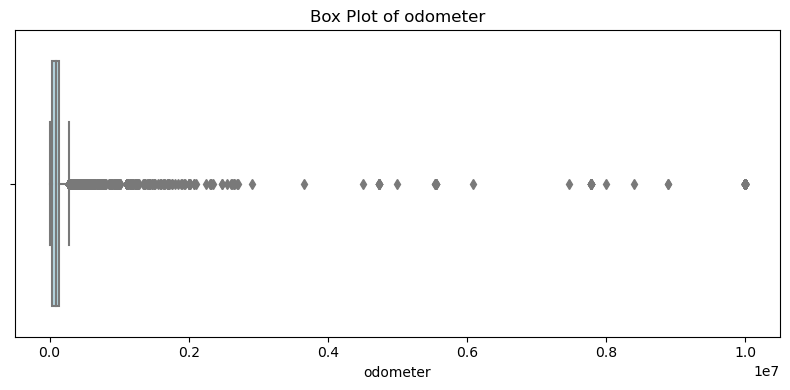

In [130]:
box_plot('odometer')

as we can see they are a lots of outliers in these columns,the Outliers reduces the accuracy of a model. We have to detect outliers and remove them.

now i want to apply the IQR if you want more information about this i recommend the following video that i take the solution from it
> https://www.youtube.com/watch?v=A3gClkblXK8

In [142]:
def IQR(name):
    global new_df
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    print(f"Q1  {name}  {Q1}, Q3  {name}  {Q3}")
    print("---------------------------------------")
    iqr = Q3 - Q1
    print(f"IQR for {name} is equal to {iqr}")
    print("---------------------------------------")
    upper_limit = Q1 + 1.5 * iqr
    lower_limit = df[name].quantile(0.15)
    new_df = df[(df[name] < upper_limit) & (df[name] > lower_limit)]
    print(f"new_df for {name} is { new_df}")
    print("---------------------------------------")
    print(f"the shape for it { new_df.shape}")
    

In [143]:

IQR('price')

Q1  price  7999.0, Q3  price  21921.5
---------------------------------------
IQR for price is equal to 13922.5
---------------------------------------
new_df for price is         year manufacturer   model  condition    cylinders   fuel  odometer  \
1       2008     cadillac  others    unknown      unknown    gas    170276   
4       2008       toyota    rav4       good  6 cylinders    gas    138900   
5       2010         ford    f150  excellent  8 cylinders    gas    156700   
6       2015       nissan  others  excellent  6 cylinders    gas     67351   
7       2016         ford  others    unknown      unknown    gas     37000   
...      ...          ...     ...        ...          ...    ...       ...   
290115  2009       toyota  others    unknown  6 cylinders    gas    146655   
290116  2014         audi  others    unknown  4 cylinders    gas    108330   
290118  2011    chevrolet  impala    unknown      unknown  other     98499   
290119  2013          ram    2500       good  8 

In [144]:

IQR('odometer')


Q1  odometer  64000.0, Q3  odometer  130577.5
---------------------------------------
IQR for odometer is equal to 66577.5
---------------------------------------
new_df for odometer is         year manufacturer     model  condition    cylinders   fuel  odometer  \
4       2008       toyota      rav4       good  6 cylinders    gas    138900   
5       2010         ford      f150  excellent  8 cylinders    gas    156700   
6       2015       nissan    others  excellent  6 cylinders    gas     67351   
8       2012       toyota    others    unknown  6 cylinders    gas    157653   
12      2015         ford    others    unknown      unknown    gas     99000   
...      ...          ...       ...        ...          ...    ...       ...   
290117  1986    chevrolet    others       good  8 cylinders    gas     74100   
290118  2011    chevrolet    impala    unknown      unknown  other     98499   
290119  2013          ram      2500       good  8 cylinders    gas    135000   
290125  2013  

## Feature Enginneering

In [145]:
new_df.sample(10)

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,price
284018,2014,volkswagen,others,excellent,6 cylinders,gas,159650,clean,automatic,4wd,SUV,blue,12250
110954,2011,chrysler,others,excellent,8 cylinders,gas,160937,clean,automatic,rwd,sedan,unknown,8995
269015,2017,bmw,others,excellent,unknown,gas,70924,clean,automatic,rwd,sedan,black,17985
134739,2012,ford,f-150,good,8 cylinders,gas,160000,clean,automatic,unknown,pickup,red,11500
134641,2013,nissan,others,good,4 cylinders,gas,91000,clean,automatic,fwd,sedan,silver,6950
209714,2017,ford,others,excellent,4 cylinders,gas,106730,unknown,automatic,unknown,SUV,unknown,12506
95432,2009,honda,others,excellent,4 cylinders,gas,159000,clean,automatic,fwd,sedan,blue,6500
117865,2012,jeep,others,unknown,unknown,gas,123803,unknown,automatic,4wd,unknown,silver,13995
123991,2009,ford,others,good,4 cylinders,gas,97000,clean,automatic,fwd,sedan,unknown,4500
126770,2016,honda,accord,excellent,4 cylinders,gas,68220,clean,automatic,fwd,sedan,blue,16900


In [146]:
# convert the odometer and year from float to integer
new_df['odometer'] = new_df['odometer'].astype(int)
new_df['year'] =  new_df['year'].astype(int)

C:\Users\emana\AppData\Local\Temp\ipykernel_18496\1939936507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['odometer'] = new_df['odometer'].astype(int)
C:\Users\emana\AppData\Local\Temp\ipykernel_18496\1939936507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['year'] =  new_df['year'].astype(int)


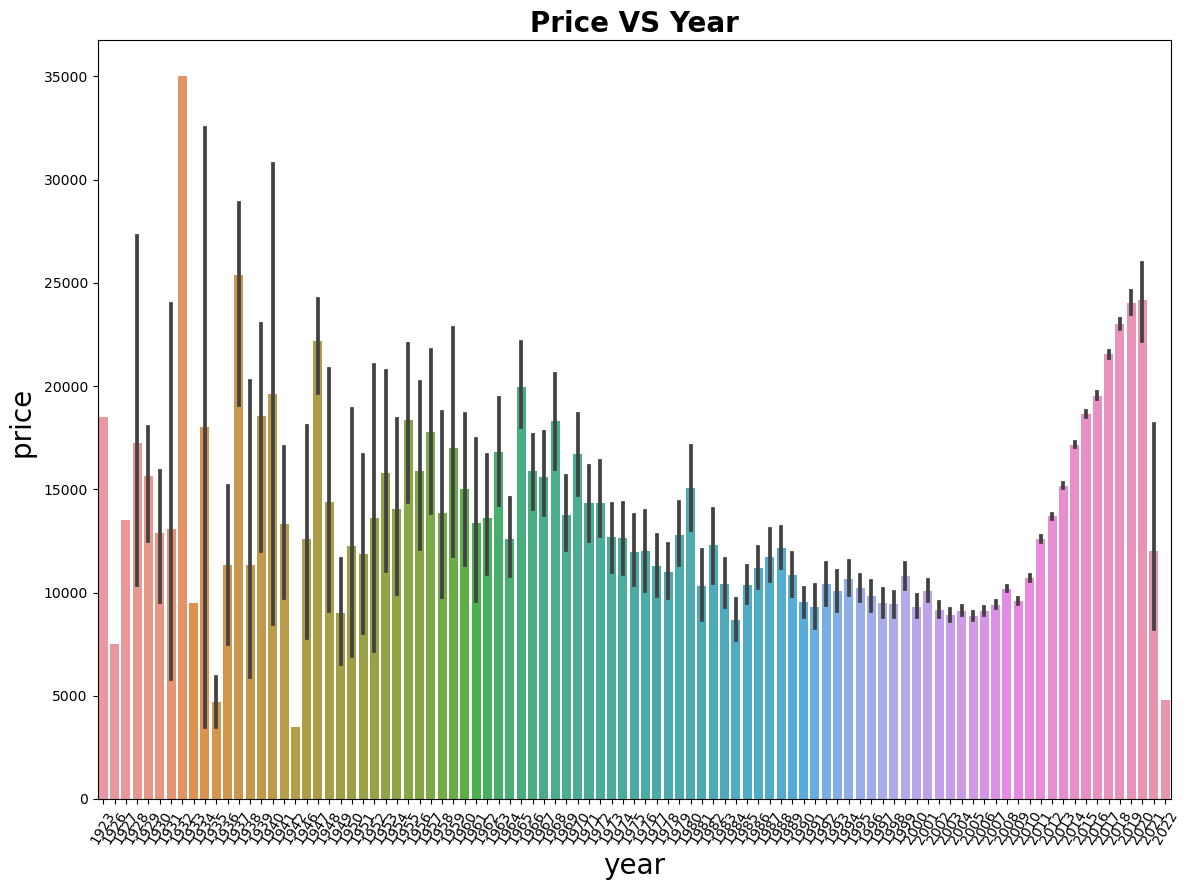

In [147]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize =(12,9))
sns.barplot(y= new_df['price'],x= new_df['year'])
plt.title("Price VS Year",fontsize=20,fontweight ='bold')
plt.xlabel('year',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('price ',fontsize = 20)
plt.tight_layout()
plt.show()

We can see the car data before 1999 is quiet irrelevant with our current times data. So we are extracting all the car data available after 1999

In [148]:
new_df = new_df[new_df['year'] > 1999]
new_df.shape

(119234, 13)

here we want to create a new column refered to the age of  the car and then we wanted to delete the year column

In [149]:
new_df['car_age'] = 2022 - new_df['year']
new_df.drop(['year'], axis = 1, inplace = True)

In [150]:
# lets see the new data
new_df.describe()

,odometer,price,car_age
count,119234.000000,119234.000000,119234.000000
mean,103690.244939,14691.969656,10.210972
std,31414.551745,8229.252533,4.036998
min,47809.000000,3315.000000,0.000000
25%,77803.000000,7995.000000,7.000000
50%,102561.000000,12953.000000,9.000000
75%,129241.000000,19900.000000,13.000000
max,163865.000000,36750.000000,22.000000


## Data Visualization

In [151]:
sample_data = new_df.sample(200)

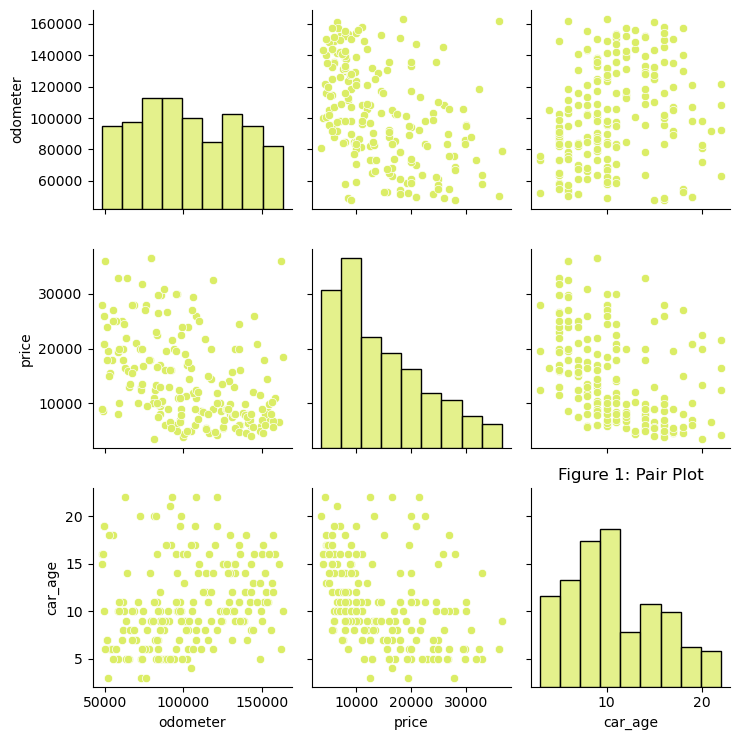

In [152]:
sns.pairplot(sample_data)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.savefig('Insight-Pair-Plot',dpi=None)
plt.show()

<AxesSubplot:>

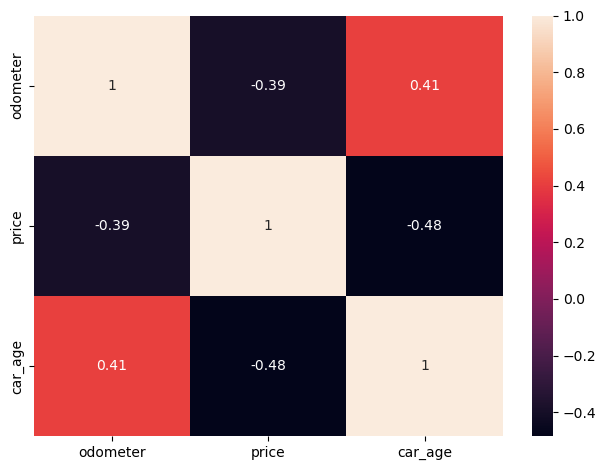

In [154]:
sns.heatmap(new_df.corr(), annot=True)

C:\Users\emana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


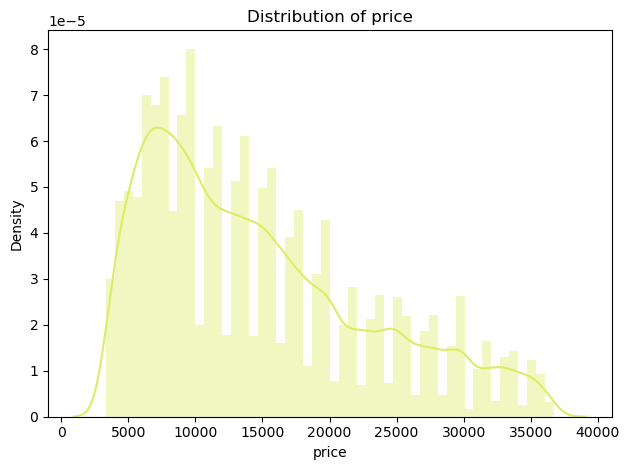

In [155]:
sns.distplot(new_df.price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('Insight-Dist-Plot',dpi=None)
plt.show()

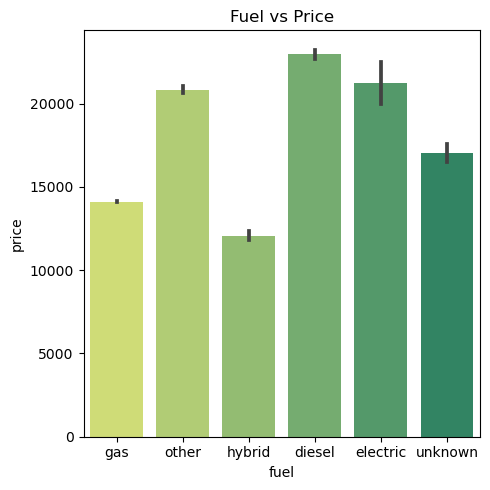

In [156]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.barplot(x='fuel',y='price',data=new_df,ax=axs)
axs.set_title('Fuel vs Price')

plt.savefig('Insight-Figure-1',dpi=None)
plt.show()

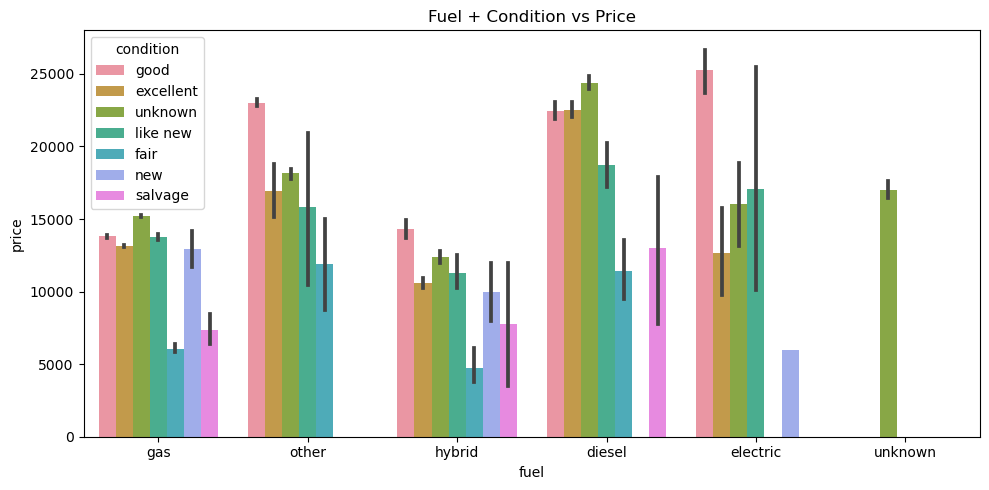

In [157]:
plt.figure(figsize=(10,5))
sns.barplot(x='fuel',y='price',hue='condition',data=new_df)
plt.title('Fuel + Condition vs Price')
plt.savefig('Insight-Figure-2',dpi=None)
plt.show()

## Data Preprocessing

In [158]:
new_df.columns

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color', 'price',
       'car_age'],
      dtype='object')

In [159]:
final_df = new_df.copy()

Creating encoder and implimenting them into pipeline

In [160]:
from sklearn.pipeline import Pipeline

In [161]:
pipe_categorical = Pipeline(
    steps = [('ordinal_encoder', OrdinalEncoder(categories = [[ 'salvage', 'fair', 'unknown', 'good', 'excellent', 'like new', 'new']])),
             ('one_hot_encoder', OneHotEncoder(sparse = False, drop = 'first'))]
)

In [162]:
pipe_numerical = Pipeline(
    steps = [('standard_scaler', StandardScaler())]
)

In [172]:
column_transformer = ColumnTransformer(transformers = [
    ('condition_pipe_trans', pipe_categorical['ordinal_encoder'], ['condition']),
    ('categorical_pipe_trans', pipe_categorical['one_hot_encoder'], ['model', 'manufacturer', 'fuel', 'cylinders','title_status', 'transmission', 'drive', 'type', 'paint_color']),
    ('numerical_pipe_trans', pipe_numerical, ['odometer'])
])

##  Train-test-split


In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['price'], axis = 1), final_df['price'], random_state = 42, test_size = .2)

In [175]:
X_train_tnf = column_transformer.fit_transform(X_train)

In [176]:
X_test_tnf = column_transformer.transform(X_test)

In [177]:
print(pd.DataFrame(X_train_tnf).shape)
print(pd.DataFrame(X_test_tnf).shape)

(95387, 131)
(23847, 131)


## Model Training


In [184]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

In [185]:
def result(y_test, y_pred):
    r=[]
    r.append('%.4f' % r2_score(y_test,y_pred))
    r.append('%.4f' % (r2_score(y_test,y_pred)*100))
    r.append('%.2f' % mean_squared_error(y_test, y_pred))
    r.append('%.2f' % mean_absolute_error(y_test, y_pred))
    r.append('%.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return (r)

#dataframe that store the performance of each model
score_data = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

# Linear Regression


In [186]:
LR = LinearRegression()
LR.fit(X_train_tnf, y_train)
y_pred = LR.predict(X_test_tnf)

In [187]:
R2_score = r2_score(y_test, y_pred)*100
score_lr = result(y_test, y_pred)
score_data['Linear Regression'] = score_lr
print('R2_score: ', score_lr[0])
print('Mean squared error: ', score_lr[2])
print('Mean absolute error: ', score_lr[3])
print('Root mean squared error: ', score_lr[4])

R2_score:  0.5463
Mean squared error:  30636440.87
Mean absolute error:  4248.59
Root mean squared error:  5535.02


# K-Nearest Neighbour


In [188]:
KNN = KNeighborsRegressor(n_neighbors=5) 
KNN.fit(X_train_tnf, y_train)
y_pred = KNN.predict(X_test_tnf)

In [189]:
score_knn = result(y_test, y_pred)
score_data['K-Nearest Neighbour'] = score_knn
print('R2 score: ', score_knn[0])
print('Mean squared error: ', score_knn[2])
print('Mean absolute error: ', score_knn[3])
print('Root mean squared error: ', score_knn[4])

R2 score:  0.6854
Mean squared error:  21245371.28
Mean absolute error:  3062.71
Root mean squared error:  4609.27


# Random Forest Regression


In [190]:
RFR = RandomForestRegressor(n_estimators=150,random_state=0, min_samples_leaf=1, max_features=0.3, n_jobs=-1, oob_score=True)
RFR.fit(X_train_tnf, y_train)
y_pred = RFR.predict(X_test_tnf)

In [191]:
score_rfr = result(y_test, y_pred)
score_data['Random Forest Regression'] = score_rfr
print('R2 score: ', score_rfr[0])
print('Mean squared error: ', score_rfr[2])
print('Mean absolute error: ', score_rfr[3])
print('Root mean squared error: ', score_rfr[4])

R2 score:  0.7826
Mean squared error:  14683228.61
Mean absolute error:  2333.80
Root mean squared error:  3831.87


# Bagging Regressor


In [192]:
baggReg = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train_tnf, y_train)
y_pred = baggReg.predict(X_test_tnf)

In [193]:
score_bagg = result(y_test, y_pred)
score_data['Bagging Regressor'] = score_bagg
print('R2 score: ', score_bagg[0])
print('Mean squared error: ', score_bagg[2])
print('Mean absolute error: ', score_bagg[3])
print('Root mean squared error: ', score_bagg[4])

R2 score:  0.6355
Mean squared error:  24612259.27
Mean absolute error:  3275.06
Root mean squared error:  4961.07


# AdaBoost Regressor


In [194]:
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.1)
ABR.fit(X_train_tnf, y_train)
y_pred = ABR.predict(X_test_tnf)

In [195]:
score_abr = result(y_test, y_pred)
score_data['AdaBoost Regressor'] = score_abr
print('R2 score: ', score_abr[0])
print('Mean squared error: ', score_abr[2])
print('Mean absolute error: ', score_abr[3])
print('Root mean squared error: ', score_abr[4])

R2 score:  0.7673
Mean squared error:  15714614.90
Mean absolute error:  2455.96
Root mean squared error:  3964.17


# XGBoost Regressor


In [196]:
XGB = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
XGB.fit(X_train_tnf, y_train)
y_pred = XGB.predict(X_test_tnf)

In [197]:
score_xgb = result(y_test, y_pred)
score_data['XGBoost Regressor'] = score_xgb
print('R2 score: ', score_xgb[0])
print('Mean squared error: ', score_xgb[2])
print('Mean absolute error: ', score_xgb[3])
print('Root mean squared error: ', score_xgb[4])

R2 score:  0.7533
Mean squared error:  16658831.08
Mean absolute error:  2227.57
Root mean squared error:  4081.52


# Overall result and model selection

In [198]:
score_data

,Linear Regression,K-Nearest Neighbour,Random Forest Regression,Bagging Regressor,AdaBoost Regressor,XGBoost Regressor
R2 Score,0.5463,0.6854,0.7826,0.6355,0.7673,0.7533
Accuracy(%),54.6335,68.5398,78.2571,63.5541,76.7298,75.3316
Mean Squared Error,30636440.87,21245371.28,14683228.61,24612259.27,15714614.90,16658831.08
Mean Absolute Error,4248.59,3062.71,2333.80,3275.06,2455.96,2227.57
Root MSE,5535.02,4609.27,3831.87,4961.07,3964.17,4081.52
